In [1]:
import powerlaw
from astropy.table import Table
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from scipy import interpolate
import pandas as pd
import sympy as syp
from astropy import units as u
import radio_beam
from astropy.table import Table
from radio_beam import Beam
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
from dendrocat.aperture import Ellipse
from astropy.io import ascii
import astropy.constants as c
from functools import reduce
from itertools import chain
W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'

#---------- high res B6 (before conv) ------------
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural =  W51cont+'W51n_cont_bignatural.image.fits'

#---------- high res B3 (before conv) ------------
W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'

w51n_b6_conv_briggs = w51conv + 'w51n_briggs_B6_conv.fits'
w51n_b6_conv_robust0 = w51conv + 'w51n_robust0_B6_conv.fits'
w51n_b6_conv_superuniform = w51conv + 'w51n_superuniform_B6_conv.fits'

w51e_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51e_matched.fits'
w51n_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51n_matched.fits'
w51n_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'
w51e_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_almaimf_coretemp = '/home/t.yoo/W51-E_core_temperature_smooth_catalog.dat'
w51n_almaimf_coretemp = '/home/t.yoo/W51-IRS2_core_temperature_smooth_catalog.dat'

catalogdir = '/orange/adamginsburg/ALMA_IMF/catalogs/getsf-smoothed/'
cat_w51e = catalogdir + 'W51-E-getsf.cat'
cat_w51n = catalogdir + 'W51-IRS2-getsf.cat'

photometrydir = '/home/t.yoo/w51/catalogue/photometry/'
w51e_b3_flux = photometrydir+'w51e_b3_flux_size.fits'
w51n_b3_flux = photometrydir+'w51n_b3_flux_size.fits'
w51e_b6_flux = photometrydir+'w51e_b6_flux_size.fits'
w51n_b6_flux = photometrydir+'w51n_b6_flux_size.fits'



class catdata():
    def __init__(self,catfile,band='B3'):
        catdata_w51e = ascii.read(catfile,data_start=0,format='commented_header', header_start=120,  comment="!")
        self.sky_ra = catdata_w51e['WCS_ACOOR']
        self.sky_dec = catdata_w51e['WCS_DCOOR']
        self.pix_x = catdata_w51e['XCO_P']
        self.pix_y = catdata_w51e['YCO_P']
        
        if band=='B3':
            bandind = 3
        else:
            bandind = 2

        self.afwhm = catdata_w51e['AFWHM0%d'%bandind]
        self.bfwhm = catdata_w51e['BFWHM0%d'%bandind]

        self.asize = catdata_w51e['ASIZE0%d'%bandind]
        self.bsize = catdata_w51e['BSIZE0%d'%bandind]

        self.theta = catdata_w51e['THETA0%d'%bandind]
        
        self.flux = catdata_w51e['FXT_BST0%d'%bandind]
        self.fluxerr = catdata_w51e['FXT_ERR0%d'%bandind]
        self.flux_g = catdata_w51e['FXT_ALT0%d'%bandind]

        self.fooa = catdata_w51e['FOOA0%d'%bandind]
        self.foob = catdata_w51e['FOOB0%d'%bandind]
        
        self.int_peak = catdata_w51e['FXP_BST0%d'%bandind]
        self.interr_peak = catdata_w51e['FXP_ERR0%d'%bandind]


        self.no = catdata_w51e['NO']

        self.rec_ind_b3 = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15))[0]

        self.rec_ind_b6 = np.where((np.abs(catdata_w51e['GOODM02'])>1)&
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
        self.rec_ind = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15) &
                           (np.abs(catdata_w51e['GOODM02'])>1) &
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
        rescaled_3mmflux = catdata_w51e['FXT_BST03'] * catdata_w51e['AFWHM02']/catdata_w51e['AFWHM03']
        gamma = np.log10(catdata_w51e['FXT_BST02'] / rescaled_3mmflux)/np.log10(228.918/101.426)
        self.woffind = np.where(gamma>2)[0]
        
def get_temperature(tempfile,sky_ra,sky_dec,threshold=1e-4):
    tab = ascii.read(tempfile, data_start=4)
    ra = tab['col2']
    dec = tab['col3']
    temp = tab['col4']

    temparr = []
    for i in range(len(ra)):
        dist = np.sqrt((ra[i]-sky_ra)**2+(dec[i]-sky_dec)**2)
        mindist = np.min(dist)
        if mindist<threshold:
            index = np.argmin(dist)
            temparr.append(temp[index])
        else:
            temparr.append(np.nan)

    return np.array(temparr)  

def get_coremass(freq, kappa, dist, peak_flux, int_flux, temp):

    mass = - 1 / kappa * dist**2 * int_flux / peak_flux * np.log(1 - (peak_flux  / BB(freq,temp)).to(u.cm/u.cm).value)
    return mass.to(u.Msun)
    
def get_coremasserr(freq, kappa, dist, peak_flux, int_flux, peak_fluxerr, int_fluxerr,temp):
    mass = get_coremass(freq, kappa, dist, peak_flux, int_flux, temp)
    print('ho',np.sqrt((int_fluxerr/int_flux)**2+(peak_fluxerr/peak_flux)**2+(peak_fluxerr/peak_flux/np.log(1-(peak_flux  / BB(freq,temp))))**2))
    error2 = peak_fluxerr/BB(freq,temp)/(1-peak_flux/BB(freq,temp))/np.log(1-peak_flux/BB(freq,temp))
    print(error2)
    error2=0
    masserr = np.abs(mass * np.sqrt((int_fluxerr/int_flux)**2+(peak_fluxerr/peak_flux)**2+(error2)**2))
    return masserr.to(u.Msun)  


def kappa(nu, nu0=271.1*u.GHz, kappa0=0.0114*u.cm**2*u.g**-1, beta=1.75):
    """
    Compute the opacity $\kappa$ given a reference frequency (or wavelength)
    and a power law governing the opacity as a fuction of frequency:
    $$ \kappa = \kappa_0 \left(\\frac{\\nu}{\\nu_0}\\right)^{\\beta} $$
    The default kappa=0.0114 at 271.1 GHz comes from extrapolating the
    Ossenkopf & Henning 1994 opacities for the thin-ice-mantle, 10^6 year model
    anchored at 1.0 mm with an assumed beta of 1.75.
    Parameters
    ----------
    nu: astropy.Quantity [u.spectral() equivalent]
        The frequency at which to evaluate kappa
    nu0: astropy.Quantity [u.spectral() equivalent]
        The reference frequency at which $\kappa$ is defined
    kappa0: astropy.Quantity [cm^2/g]
        The dust opacity per gram of H2 along the line of sight.  Because of
        the H2 conversion, this factor implicitly includes a dust to gas ratio
        (usually assumed 100)
    beta: float
        The power-law index governing kappa as a function of nu
    """
    return (kappa0*(nu.to(u.GHz,u.spectral())/nu0.to(u.GHz,u.spectral()))**(beta)).to(u.cm**2/u.g)   
def BB(freq, temp):
    B_nu = (2 * freq**3 *c.h / (c.c**2) * 1 / (np.e**(c.h*freq/(c.k_B*temp))-1))
    return B_nu 
def exist_inside_FOV(xcore_sky, ycore_sky, yso_image, hrhdr):
    isfinite = np.where(np.isfinite(yso_image))
    xfinite1 = np.min(isfinite[0])
    xfinite2 = np.max(isfinite[0])
    yfinite1 = np.min(isfinite[1])
    yfinite2 = np.max(isfinite[1])
    
    xcen = (xfinite1 + xfinite2)/2
    ycen = (yfinite1 + yfinite2)/2

    wcs_hr = WCS(hrhdr,naxis=2)
    xypos = wcs_hr.wcs_world2pix(np.vstack((xcore_sky,ycore_sky)).T,0)
    
    rad = np.abs(xfinite2 - xcen)
    
    
    dist = np.sqrt((xypos[:,0]- xcen)**2+(xypos[:,1]-ycen)**2)
    isinside = np.where(dist<rad)[0]
    
    return isinside

def cen_freq(center, delta ,alpha=2):
    start = center-delta/2 ; end = center+delta/2
    freqarr = np.logspace(np.log10(start),np.log10(end),20)
    dfreq = freqarr[1:]-freqarr[:-1]
    dfreq = np.append(dfreq,[dfreq[-1]])
    
    integral_up = np.sum(freqarr**(alpha+1)*dfreq)
    integral_down = np.sum(freqarr**(alpha)*dfreq)
    return integral_up/integral_down*u.Hz



In [2]:
import matplotlib as mpl
plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
mpl.rcParams['axes.linewidth'] = 5
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2
params = {"xtick.top": True, "ytick.right": True, "xtick.direction": "in", "ytick.direction": "in"}
plt.rcParams.update(params)

#fig = plt.figure(figsize=(24,8))
#ax1 = fig.add_axes([0.1,0.12,0.28,0.8])
#ax2 = fig.add_axes([0.43,0.12,0.28,0.8])
#ax3 = fig.add_axes([0.76,0.12,0.28,0.8])



hdrB6_w51e_almaimf = fits.getheader(w51e_b6_almaimf)  
wcsB6_w51e_almaimf = WCS(hdrB6_w51e_almaimf,naxis=2)
beamb6_w51e_almaimf = Beam.from_fits_header(hdrB6_w51e_almaimf)  

hdrB3_w51e_almaimf = fits.getheader(w51e_b3_almaimf)  
wcsB3_w51e_almaimf = WCS(hdrB3_w51e_almaimf,naxis=2)
beamb3_w51e_almaimf = Beam.from_fits_header(hdrB3_w51e_almaimf) 

hdrB6_w51n_almaimf = fits.getheader(w51n_b6_almaimf)  
wcsB6_w51n_almaimf = WCS(hdrB6_w51n_almaimf,naxis=2)
beamb6_w51n_almaimf = Beam.from_fits_header(hdrB6_w51n_almaimf)  

hdrB3_w51n_almaimf = fits.getheader(w51n_b3_almaimf)  
wcsB3_w51n_almaimf = WCS(hdrB3_w51n_almaimf,naxis=2)
beamb3_w51n_almaimf = Beam.from_fits_header(hdrB3_w51n_almaimf)  


freqb3 = cen_freq(hdrB3_w51n_almaimf['CRVAL4'],hdrB3_w51n_almaimf['CDELT4'])
freqb6 = cen_freq(hdrB6_w51n_almaimf['CRVAL4'],hdrB6_w51n_almaimf['CDELT4'])

fitsdata_b3 = fits.open(w51e_b3_tt0)
image_b3_w51e = fitsdata_b3[0].data
if len(image_b3_w51e.shape)>2:
    image_b3_w51e = fitsdata_b3[0].data[0][0]
hdrB3_w51e_hr = fits.getheader(w51e_b3_tt0)  
    
fitsdata_b3 = fits.open(w51n_b3_tt0)
image_b3_w51n = fitsdata_b3[0].data
if len(image_b3_w51n.shape)>2:
    image_b3_w51n = fitsdata_b3[0].data[0][0]
hdrB3_w51n_hr = fits.getheader(w51n_b3_tt0)  

fitsdata_b6 = fits.open(w51e_b6_calibrated_pbcor)
image_b6_w51e = fitsdata_b6[0].data
if len(image_b6_w51e.shape)>2:
    image_b6_w51e = fitsdata_b6[0].data[0][0]
hdrB6_w51e_hr = fits.getheader(w51e_b6_calibrated_pbcor)  
    
fitsdata_b6 = fits.open(w51n_b6_calibrated_pbcor)
image_b6_w51n = fitsdata_b6[0].data
if len(image_b6_w51n.shape)>2:
    image_b6_w51n = fitsdata_b6[0].data[0][0]
hdrB6_w51n_hr = fits.getheader(w51n_b6_calibrated_pbcor)  
    
catalog_w51e_yso = Table.read(w51e_matched_catalog ,format='fits')
w51e_xsky_b6 = catalog_w51e_yso['b6_xsky'] ; w51e_ysky_b6 = catalog_w51e_yso['b6_ysky']
w51e_xsky_b3 = catalog_w51e_yso['b3_xsky'] ; w51e_ysky_b3 = catalog_w51e_yso['b3_ysky']

detect_w51e_b6 = np.where(w51e_xsky_b6>0)[0]
detect_w51e_b3 = np.where(w51e_xsky_b3>0)[0]


catalog_w51n_yso = Table.read(w51n_matched_catalog ,format='fits')
w51n_xsky_b6 = catalog_w51n_yso['b6_xsky'] ; w51n_ysky_b6 = catalog_w51n_yso['b6_ysky']
w51n_xsky_b3 = catalog_w51n_yso['b3_xsky'] ; w51n_ysky_b3 = catalog_w51n_yso['b3_ysky']

detect_w51n_b6 = np.where(w51n_xsky_b6>0)[0]
detect_w51n_b3 = np.where(w51n_xsky_b3>0)[0]

catdata_w51e_b3 = catdata(cat_w51e)
sky_ra_w51e_b3 = catdata_w51e_b3.sky_ra
sky_dec_w51e_b3 = catdata_w51e_b3.sky_dec
catdata_w51e_b6 = catdata(cat_w51e, band='B6')
sky_ra_w51e_b6 = catdata_w51e_b6.sky_ra
sky_dec_w51e_b6 = catdata_w51e_b6.sky_dec
catdata_w51n_b3 = catdata(cat_w51n)
sky_ra_w51n_b3 = catdata_w51n_b3.sky_ra
sky_dec_w51n_b3 = catdata_w51n_b3.sky_dec
catdata_w51n_b6 = catdata(cat_w51n, band='B6')
sky_ra_w51n_b6 = catdata_w51n_b6.sky_ra
sky_dec_w51n_b6 = catdata_w51n_b6.sky_dec

#freqb3=92982346121.91989*u.Hz

#freqb6=226691598706.70853*u.Hz
kappa_b3 = kappa(freqb3)
kappa_b6 = kappa(freqb6)

temp_w51e = get_temperature(w51e_almaimf_coretemp, sky_ra_w51e_b6,sky_dec_w51e_b6)
temp_w51n = get_temperature(w51n_almaimf_coretemp,sky_ra_w51n_b6,sky_dec_w51n_b6)
print('temp',temp_w51e)
int_peak_w51e = catdata_w51e_b6.int_peak * u.Jy 
int_peak_w51n = catdata_w51n_b6.int_peak * u.Jy 
interr_peak_w51e = catdata_w51e_b6.interr_peak * u.Jy 
interr_peak_w51n = catdata_w51n_b6.interr_peak * u.Jy 
flux_int_w51e = catdata_w51e_b6.flux * u.Jy
flux_int_w51n = catdata_w51n_b6.flux * u.Jy
fluxerr_int_w51e = catdata_w51e_b6.fluxerr * u.Jy
fluxerr_int_w51n = catdata_w51n_b6.fluxerr * u.Jy

major_w51e = catdata_w51e_b6.afwhm*5.41*1000
minor_w51e = catdata_w51e_b6.bfwhm*5.41*1000

major_w51n = catdata_w51n_b6.afwhm*5.1*1000
minor_w51n = catdata_w51n_b6.bfwhm*5.1*1000

size_w51e = (major_w51e*minor_w51e**2)**(1/3)
size_w51n = (major_w51n*minor_w51n**2)**(1/3)


coremass_w51e = get_coremass(freqb6, kappa_b6, 5.41*u.kpc, int_peak_w51e, flux_int_w51e,temp_w51e*u.K)
coremass_w51n = get_coremass(freqb6, kappa_b6, 5.1*u.kpc, int_peak_w51n, flux_int_w51n,temp_w51n*u.K)

isinside_w51e_b3 = exist_inside_FOV(sky_ra_w51e_b6, sky_dec_w51e_b6, image_b3_w51e, hdrB3_w51e_hr)
isinside_w51e_b6 = exist_inside_FOV(sky_ra_w51e_b6, sky_dec_w51e_b6, image_b6_w51e, hdrB6_w51e_hr)
isinside_w51n_b3 = exist_inside_FOV(sky_ra_w51n_b6, sky_dec_w51n_b6, image_b3_w51n, hdrB3_w51n_hr)
isinside_w51n_b6 = exist_inside_FOV(sky_ra_w51n_b6, sky_dec_w51n_b6, image_b6_w51n, hdrB6_w51n_hr)

rescale_w51e = catdata_w51e_b6.afwhm * catdata_w51e_b6.bfwhm /(catdata_w51e_b3.afwhm * catdata_w51e_b3.bfwhm)
si_w51e = np.log(catdata_w51e_b6.flux/catdata_w51e_b3.flux/rescale_w51e)/np.log(freqb6/freqb3)

rescale_w51n = catdata_w51n_b6.afwhm * catdata_w51n_b6.bfwhm /(catdata_w51n_b3.afwhm * catdata_w51n_b3.bfwhm)
si_w51n = np.log(catdata_w51n_b6.flux/catdata_w51n_b3.flux/rescale_w51n)/np.log(freqb6/freqb3)

siind_w51e = np.where(si_w51e>=2)[0]
siind_w51n = np.where(si_w51n>=2)[0]




temp [62.8  63.54 24.22 61.72 57.26 23.72 23.78 54.98 23.77 36.06 23.27 49.07
 31.74 48.08 28.58 53.95 24.72 23.07 27.35 23.75 22.99 23.   37.58 22.61
 34.45 25.01 47.92 31.97 23.98 24.22 23.57 37.79 23.11 23.37 22.79 45.24
 50.82 26.23 31.35 41.92 45.79]


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


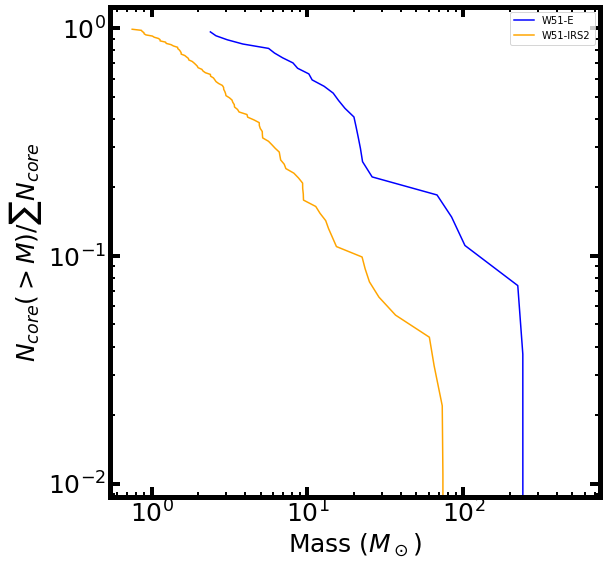

In [3]:
totalind_w51e = np.intersect1d(isinside_w51e_b3,catdata_w51e_b6.rec_ind_b6)
totalind_w51n = np.intersect1d(isinside_w51n_b3,catdata_w51n_b6.rec_ind_b6)

cmf_w51e = np.sort(coremass_w51e[totalind_w51e])
cmf_w51n = np.sort(coremass_w51n[totalind_w51n])

num_w51e = np.arange(len(cmf_w51e))[::-1]/len(cmf_w51e)
num_w51n = np.arange(len(cmf_w51n))[::-1]/len(cmf_w51n)

fit_w51e = powerlaw.Fit(cmf_w51e)
fit_w51n = powerlaw.Fit(cmf_w51n)


fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1,0.1,0.85,0.85])
ax1.plot(cmf_w51e, num_w51e, c='b',label='W51-E')
ax1.plot(cmf_w51n, num_w51n, c='orange',label='W51-IRS2')

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xlabel(r'Mass ($M_\odot$)')
ax1.set_ylabel('$N_{core}(>M)/\sum N_{core}$')

ax1.legend()


In [4]:
def get_mass(flux, kappa, freq,temp=50*u.K, dist=5.41*u.kpc):
    BB = 2 *np.pi * c.h * freq**3 / (c.c**2) / (np.e**(c.h*freq/(c.k_B*temp)) - 1)
    mass = flux * dist**2 / BB / kappa
    return mass.to(u.Msun)

def flux_gaussian_multiple_apertures(flux, major, minor, rarr): # major, minor in FWHM, au unit
    flux_rescaled = flux*major/minor # making a 2d symmetric Gaussian with FWHM = FWHM_major
    major_sigma = major/np.sqrt(8*np.log(2))
    peak_height = flux / 2 / np.pi/ major/ minor * 8 * np.log(2)
    flux_rarr =2*np.pi*major_sigma**2 * peak_height * (1 - np.exp(-rarr**2/2/major_sigma**2))
    return flux_rarr

b3freq_yso = 92982346121.91989*u.Hz
b6freq_yso = 226691598706.70853*u.Hz
b3kappa_yso = kappa(b3freq_yso)
b6kappa_yso = kappa(b6freq_yso)


w51ecat = Table.read(w51e_matched_catalog)
w51ncat = Table.read(w51n_matched_catalog)

alphaind_w51e_yso = np.where((w51ecat['alpha']>1.7)&(w51ecat['alpha']<4))
alphaind_w51n_yso = np.where((w51ncat['alpha']>1.7)&(w51ncat['alpha']<4))


w51e_b3_flux_fits = Table.read(w51e_b3_flux)
w51e_b6_flux_fits = Table.read(w51e_b6_flux)
w51n_b3_flux_fits = Table.read(w51n_b3_flux)
w51n_b6_flux_fits = Table.read(w51n_b6_flux)
w51e_b3_int_flux = w51e_b3_flux_fits['flux']
w51e_b6_int_flux = w51e_b6_flux_fits['flux']
w51n_b3_int_flux = w51n_b3_flux_fits['flux']
w51n_b6_int_flux = w51n_b6_flux_fits['flux']



w51e_ysomass = get_mass(w51e_b3_int_flux[alphaind_w51e_yso], b3kappa_yso, b3freq_yso)
w51n_ysomass = get_mass(w51n_b3_int_flux[alphaind_w51n_yso], b3kappa_yso, b3freq_yso,dist=5.1*u.kpc)








woffind_w51e = reduce(np.intersect1d, (catdata_w51e_b6.rec_ind_b6, isinside_w51e_b3, siind_w51e))  
woffind_w51n = reduce(np.intersect1d, (catdata_w51n_b6.rec_ind_b6, isinside_w51n_b3, siind_w51n)) 

print(len(woffind_w51e), len(woffind_w51n))
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1,0.1,0.85,0.85])

cmf_w51e_woff = np.sort(coremass_w51e[woffind_w51e])
cmf_w51n_woff = np.sort(coremass_w51n[woffind_w51n])
num_w51e_woff = np.arange(len(cmf_w51e_woff))[::-1]/len(cmf_w51e_woff)
num_w51n_woff = np.arange(len(cmf_w51n_woff))[::-1]/len(cmf_w51n_woff)

#ax1.plot(cmf_w51e_woff, num_w51e_woff, c='b',label='W51-E')
#ax1.plot(cmf_w51n_woff, num_w51n_woff, c='orange',label='W51-IRS2')

w51e_cmf_fit = powerlaw.Fit(cmf_w51e_woff)
w51n_cmf_fit = powerlaw.Fit(cmf_w51n_woff)
print(w51e_cmf_fit.xmin, w51n_cmf_fit.xmin)
print(w51e_cmf_fit.alpha, w51n_cmf_fit.alpha)
w51e_cmf_fit.plot_ccdf(color='b',ax=ax1)
w51e_cmf_fit.power_law.plot_ccdf(color='b',ax=ax1,ls='dashed', label=r'CMF (W51-E) $\alpha=%3.2f\pm%3.2f$'%(w51e_cmf_fit.alpha,w51e_cmf_fit.sigma))
w51n_cmf_fit.plot_ccdf(color='orange',ax=ax1)
w51n_cmf_fit.power_law.plot_ccdf(color='orange',ax=ax1,ls='dashed', label=r'CMF (W51-IRS2) $\alpha=%3.2f\pm%3.2f$'%(w51n_cmf_fit.alpha,w51n_cmf_fit.sigma))


w51e_yso_fit = powerlaw.Fit(w51e_ysomass)
w51n_yso_fit = powerlaw.Fit(w51n_ysomass)

w51e_yso_fit.plot_ccdf(color='cyan',ax=ax1)
w51e_yso_fit.power_law.plot_ccdf(color='cyan',ax=ax1,ls='dashed', label=r'YMF (W51-E) $\alpha=%3.2f\pm%3.2f$'%(w51e_yso_fit.alpha,w51e_yso_fit.sigma))
w51n_yso_fit.plot_ccdf(color='gold',ax=ax1)
w51n_yso_fit.power_law.plot_ccdf(color='gold',ax=ax1,ls='dashed', label=r'YMF (W51-IRS2) $\alpha=%3.2f\pm%3.2f$'%(w51n_yso_fit.alpha,w51n_yso_fit.sigma))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(fontsize=15)
ax1.set_xlabel(r'Mass ($M_\odot$)')
ax1.set_ylabel('$N(>M)/\sum N$')

UnitConversionError: 'Jy' (spectral flux density) and 'solMass' (mass) are not convertible

In [ ]:
def get_mass(flux, kappa, freq,temp=50*u.K, dist=5.41*u.kpc):
    BB = 2 *np.pi * c.h * freq**3 / (c.c**2) / (np.e**(c.h*freq/(c.k_B*temp)) - 1)
    mass = flux * dist**2 / BB / kappa
    return mass.to(u.Msun)

def flux_gaussian_multiple_apertures(flux, major, minor, rarr): # major, minor in FWHM, au unit
    flux_rescaled = flux*major/minor # making a 2d symmetric Gaussian with FWHM = FWHM_major
    major_sigma = major/np.sqrt(8*np.log(2))
    peak_height = flux / 2 / np.pi/ major/ minor * 8 * np.log(2)
    flux_rarr =2*np.pi*major_sigma**2 * peak_height * (1 - np.exp(-rarr**2/2/major_sigma**2))
    return flux_rarr

b3freq_yso = 92982346121.91989*u.Hz
b6freq_yso = 226691598706.70853*u.Hz
b3kappa_yso = kappa(b3freq_yso)
b6kappa_yso = kappa(b6freq_yso)


w51ecat = Table.read(w51e_matched_catalog)
w51ncat = Table.read(w51n_matched_catalog)

alphaind_w51e_yso = np.where((w51ecat['alpha']>1.7)&(w51ecat['alpha']<4))
alphaind_w51n_yso = np.where((w51ncat['alpha']>1.7)&(w51ncat['alpha']<4))


w51e_b3_flux_fits = Table.read(w51e_b3_flux)
w51e_b6_flux_fits = Table.read(w51e_b6_flux)
w51n_b3_flux_fits = Table.read(w51n_b3_flux)
w51n_b6_flux_fits = Table.read(w51n_b6_flux)
w51e_b3_int_flux = w51e_b3_flux_fits['flux']
w51e_b6_int_flux = w51e_b6_flux_fits['flux']
w51n_b3_int_flux = w51n_b3_flux_fits['flux']
w51n_b6_int_flux = w51n_b6_flux_fits['flux']



w51e_ysomass = get_mass(w51e_b3_int_flux[alphaind_w51e_yso], b3kappa_yso, b3freq_yso)
w51n_ysomass = get_mass(w51n_b3_int_flux[alphaind_w51n_yso], b3kappa_yso, b3freq_yso,dist=5.1*u.kpc)








woffind_w51e = reduce(np.intersect1d, (catdata_w51e_b6.rec_ind_b6, isinside_w51e_b3, siind_w51e))  
woffind_w51n = reduce(np.intersect1d, (catdata_w51n_b6.rec_ind_b6, isinside_w51n_b3, siind_w51n)) 

print(len(woffind_w51e), len(woffind_w51n))
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1,0.1,0.85,0.85])

cmf_w51e_woff = np.sort(coremass_w51e[woffind_w51e])
cmf_w51n_woff = np.sort(coremass_w51n[woffind_w51n])
num_w51e_woff = np.arange(len(cmf_w51e_woff))[::-1]/len(cmf_w51e_woff)
num_w51n_woff = np.arange(len(cmf_w51n_woff))[::-1]/len(cmf_w51n_woff)

#ax1.plot(cmf_w51e_woff, num_w51e_woff, c='b',label='W51-E')
#ax1.plot(cmf_w51n_woff, num_w51n_woff, c='orange',label='W51-IRS2')

w51e_cmf_fit = powerlaw.Fit(cmf_w51e_woff, xmin=3.86)
w51n_cmf_fit = powerlaw.Fit(cmf_w51n_woff, xmin=1.64)
w51n_cmf_fit2 = powerlaw.Fit(cmf_w51n_woff, xmin=3.86)

print(w51e_cmf_fit.xmin, w51n_cmf_fit.xmin)
print(w51e_cmf_fit.alpha, w51n_cmf_fit.alpha)
w51e_cmf_fit.plot_ccdf(color='b',ax=ax1)
w51e_cmf_fit.power_law.plot_ccdf(color='b',ax=ax1,ls='dashed', label=r'CMF (W51-E) $\alpha=%3.2f\pm%3.2f$'%(w51e_cmf_fit.alpha,w51e_cmf_fit.sigma))
w51n_cmf_fit.plot_ccdf(color='orange',ax=ax1)
w51n_cmf_fit.power_law.plot_ccdf(color='orange',ax=ax1,ls='dashed', label=r'CMF (W51-IRS2) $\alpha=%3.2f\pm%3.2f$'%(w51n_cmf_fit.alpha,w51n_cmf_fit.sigma))
w51n_cmf_fit2.plot_ccdf(color='orange',ax=ax1)
w51n_cmf_fit2.power_law.plot_ccdf(color='gold',ax=ax1,ls='dashed', label=r'CMF (W51-IRS2) $\alpha=%3.2f\pm%3.2f$'%(w51n_cmf_fit2.alpha,w51n_cmf_fit2.sigma))

w51e_yso_fit = powerlaw.Fit(w51e_ysomass, xmin=0.480)
w51n_yso_fit = powerlaw.Fit(w51n_ysomass, xmin=0.419)

w51e_yso_fit.plot_ccdf(color='cyan',ax=ax1)
w51e_yso_fit.power_law.plot_ccdf(color='cyan',ax=ax1,ls='dashed', label=r'YMF (W51-E) $\alpha=%3.2f\pm%3.2f$'%(w51e_yso_fit.alpha,w51e_yso_fit.sigma))
w51n_yso_fit.plot_ccdf(color='r',ax=ax1)
w51n_yso_fit.power_law.plot_ccdf(color='r',ax=ax1,ls='dashed', label=r'YMF (W51-IRS2) $\alpha=%3.2f\pm%3.2f$'%(w51n_yso_fit.alpha,w51n_yso_fit.sigma))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(fontsize=15)
ax1.set_xlabel(r'Mass ($M_\odot$)')
ax1.set_ylabel('$N(>M)/\sum N$')

In [ ]:


b3freq_yso = 92982346121.91989*u.Hz
b6freq_yso = 226691598706.70853*u.Hz
b3kappa_yso = kappa(b3freq_yso)
b6kappa_yso = kappa(b6freq_yso)


w51ecat = Table.read(w51e_matched_catalog)
w51ncat = Table.read(w51n_matched_catalog)

alphaind_w51e_yso = np.where((w51ecat['alpha']>1.7)&(w51ecat['alpha']<4))
alphaind_w51n_yso = np.where((w51ncat['alpha']>1.7)&(w51ncat['alpha']<4))


w51e_b3_flux_fits = Table.read(w51e_b3_flux)
w51e_b6_flux_fits = Table.read(w51e_b6_flux)
w51n_b3_flux_fits = Table.read(w51n_b3_flux)
w51n_b6_flux_fits = Table.read(w51n_b6_flux)
w51e_b3_int_flux = w51e_b3_flux_fits['flux']
w51e_b6_int_flux = w51e_b6_flux_fits['flux']
w51n_b3_int_flux = w51n_b3_flux_fits['flux']
w51n_b6_int_flux = w51n_b6_flux_fits['flux']



w51e_ysomass = get_mass(w51e_b3_int_flux[alphaind_w51e_yso], b3kappa_yso, b3freq_yso)
w51n_ysomass = get_mass(w51n_b3_int_flux[alphaind_w51n_yso], b3kappa_yso, b3freq_yso,dist=5.1*u.kpc)



woffind_w51e = reduce(np.intersect1d, (catdata_w51e_b6.rec_ind_b6, isinside_w51e_b3, siind_w51e))  
woffind_w51n = reduce(np.intersect1d, (catdata_w51n_b6.rec_ind_b6, isinside_w51n_b3, siind_w51n)) 

print(len(woffind_w51e), len(woffind_w51n))
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1,0.1,0.85,0.85])

cmf_w51e_woff = np.sort(coremass_w51e[woffind_w51e])
cmf_w51n_woff = np.sort(coremass_w51n[woffind_w51n])
num_w51e_woff = np.arange(len(cmf_w51e_woff))[::-1]/len(cmf_w51e_woff)
num_w51n_woff = np.arange(len(cmf_w51n_woff))[::-1]/len(cmf_w51n_woff)
cmf_woff = np.sort(np.append(coremass_w51e[woffind_w51e], coremass_w51n[woffind_w51n]))
#ax1.plot(cmf_w51e_woff, num_w51e_woff, c='b',label='W51-E')
#ax1.plot(cmf_w51n_woff, num_w51n_woff, c='orange',label='W51-IRS2')

w51e_cmf_fit = powerlaw.Fit(cmf_w51e_woff, xmin=3.86)
w51n_cmf_fit = powerlaw.Fit(cmf_w51n_woff, xmin=1.64)
w51n_cmf_fit2 = powerlaw.Fit(cmf_w51n_woff, xmin=3.86)

cmf_fit =  powerlaw.Fit(cmf_woff, xmin=3.86)


cmf_fit.plot_ccdf(color='b',ax=ax1)
cmf_fit.power_law.plot_ccdf(color='b',ax=ax1,ls='dashed', label=r'CMF $\alpha=%3.2f\pm%3.2f$'%(cmf_fit.alpha,cmf_fit.sigma))

ysomass = np.append(w51e_ysomass, w51n_ysomass)

yso_fit = powerlaw.Fit(ysomass, xmin=0.480)

yso_fit.plot_ccdf(color='r',ax=ax1)
yso_fit.power_law.plot_ccdf(color='r',ax=ax1,ls='dashed', label=r'YMF $\alpha=%3.2f\pm%3.2f$'%(yso_fit.alpha,yso_fit.sigma))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(fontsize=15)
ax1.set_xlabel(r'Mass ($M_\odot$)')
ax1.set_ylabel('$N(>M)/\sum N$')